In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [15]:
## 데이터 불러오기
DATA_FILE = '../Data/남북한발전전력량.xlsx'

dataDF = pd.read_excel(DATA_FILE)


In [16]:
## 데이터 확인
display(dataDF.head(9))
dataDF.info()


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

[1] 남한의 종류별 발전전력량의 변화

In [17]:
# 전처리

# 복사
dataDF2 = dataDF.copy()

# dataDF2['전출지별'].fillna(method='ffill')
dataDF2['전력량 (억㎾h)'] = dataDF2['전력량 (억㎾h)'].ffill()


dataDF2.isna().sum()
## '-' 0으로 치환
dataDF2 = dataDF2.replace('-', 0)



# 남한만 추출
SKoreaDF = dataDF2[dataDF2['전력량 (억㎾h)'] == '남한']

## 컬럼제거 + 행인덱스로
SKoreaDF = SKoreaDF.drop(columns='전력량 (억㎾h)').set_index('발전 전력별')


SKoreaDF






C:\Users\lsj03\AppData\Local\Temp\ipykernel_17632\2565668914.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF2 = dataDF2.replace('-', 0)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
수력,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
화력,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
원자력,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
신재생,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195


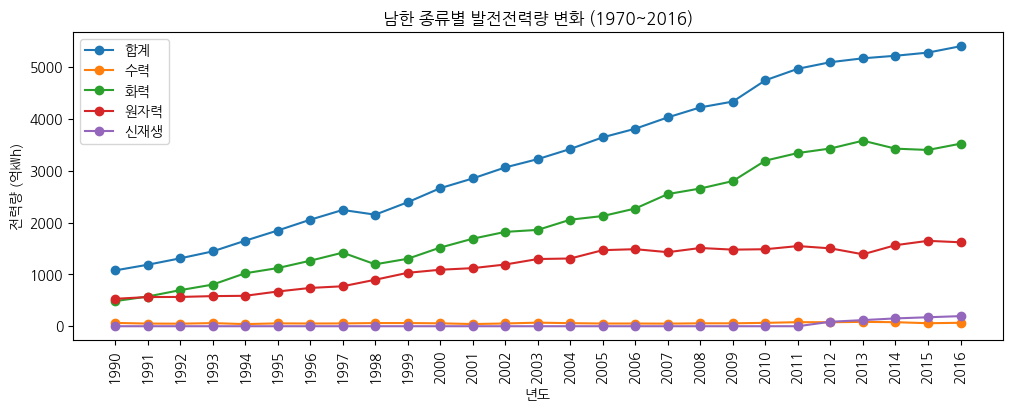

In [18]:
# 시각화
plt.figure(figsize=(12,4))
for label in SKoreaDF.index:
    plt.plot(SKoreaDF.columns, SKoreaDF.loc[label], marker='o', label=label)

plt.legend()
plt.title("남한 종류별 발전전력량 변화 (1970~2016)")
plt.xlabel("년도")
plt.ylabel("전력량 (억㎾h)")
plt.xticks(rotation=90)
plt.show()

[2] 북한의 종류별 발전전력량의 변화


In [19]:
# 전처리

# 복사
dataDF3 = dataDF.copy()

# dataDF2['전출지별'].fillna(method='ffill')
dataDF3['전력량 (억㎾h)'] = dataDF3['전력량 (억㎾h)'].ffill()


dataDF2.isna().sum()
## '-' 0으로 치환
dataDF2 = dataDF2.replace('-', 0)



# 북한만
NKoreaDF = dataDF2[dataDF2['전력량 (억㎾h)'] == '북한']

## 컬럼제거 + 행인덱스로  
NKoreaDF = NKoreaDF.drop(columns='전력량 (억㎾h)').set_index('발전 전력별')


NKoreaDF






,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


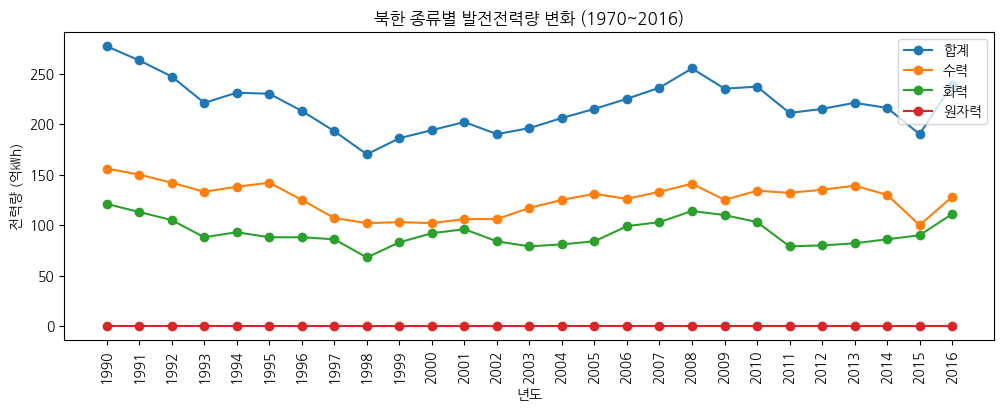

In [20]:
# 시각화
plt.figure(figsize=(12,4))
for label in NKoreaDF.index:
    plt.plot(NKoreaDF.columns, NKoreaDF.loc[label], marker='o', label=label)

plt.legend()
plt.title("북한 종류별 발전전력량 변화 (1970~2016)")
plt.xlabel("년도")
plt.ylabel("전력량 (억㎾h)")
plt.xticks(rotation=90)
plt.show()

[3] 남한과 북한의 비교

In [21]:
dataDF4 = dataDF.copy()

# 전력량 (억㎾h)과 발전 전력별을 모두 인덱스로
SNKoreaDF = dataDF4.set_index(['전력량 (억㎾h)'])

## 전력량을 지역으로 변경 
SNKoreaDF = SNKoreaDF.rename_axis('지역')
# 합계 데이터만 선택 (남한과 북한 모두)
SNKoreaDF = SNKoreaDF.loc[['남한', '북한']]
# 불필요 컬럼 제거
SNKoreaDF = SNKoreaDF.drop(columns='발전 전력별')


SNKoreaDF


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
지역,,,,,,,,,,,,,,,,,,,,,
남한,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
북한,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


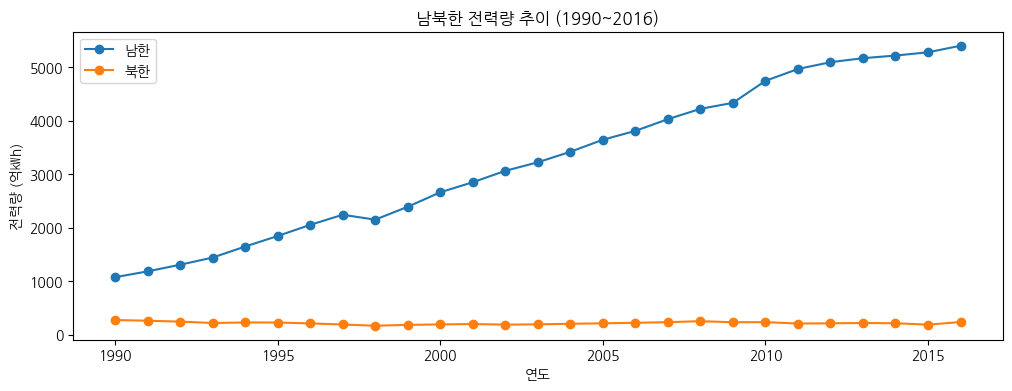

In [22]:



# 전치(T)해서 연도를 X축으로 설정
SNKoreaDF.T.plot(marker='o',figsize=(12,4))
plt.title('남북한 전력량 추이 (1990~2016)')
plt.xlabel('연도')
plt.ylabel('전력량 (억㎾h)')
plt.legend()
plt.show()

[4] 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가

In [23]:
import pandas as pd

# 1. 원본 복사 및 '-' → 0, 숫자형 변환
dataDF4 = dataDF.copy()
dataDF4['전력량 (억㎾h)'] = dataDF3['전력량 (억㎾h)'].ffill()
dataDF4 = dataDF4.replace('-', 0)

# 신재생 행 추가 북한

# 남한 신재생 복사
north_renewable = dataDF4[dataDF4['발전 전력별'] == '신재생'].iloc[0].copy()
# 이름 변경
north_renewable['전력량 (억㎾h)'] = '북한'
# 0으로 채우기 
north_renewable.iloc[2:] = 0 
# 붙이기
dataDF4 = pd.concat([dataDF4, pd.DataFrame([north_renewable])])

## 남 북 합치기
 # 연도별 숫자만 더하기
sumDF = (dataDF4.groupby('발전 전력별', as_index=False).sum(numeric_only=True)) 

# '전력량 (억㎾h)' 컬럼 새로 추가
sumDF.insert(0, '전력량 (억㎾h)', '남북한 합계')

# 컬럼제거, 행 인덱스 추가
sumDF = sumDF.drop(columns='전력량 (억㎾h)').set_index('발전 전력별')

sumDF

C:\Users\lsj03\AppData\Local\Temp\ipykernel_17632\403446103.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF4 = dataDF4.replace('-', 0)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
수력,220,201,191,193,179,197,177,161,163,164,...,183,197,181,199,210,212,223,208,158,194
신재생,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195
원자력,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
합계,1354,1449,1557,1665,1881,2077,2268,2437,2323,2579,...,4267,4479,4571,4984,5180,5311,5392,5436,5471,5643
화력,605,686,801,891,1115,1210,1352,1506,1263,1385,...,2654,2772,2912,3299,3422,3510,3663,3513,3492,3634


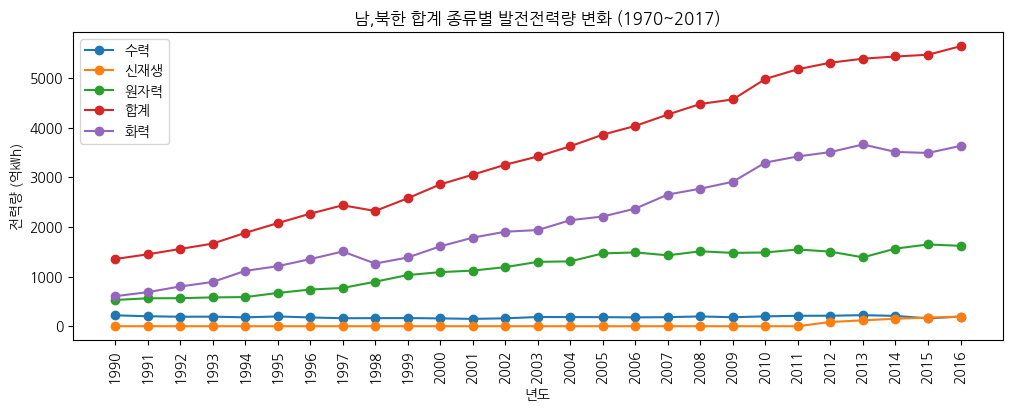

In [24]:
plt.figure(figsize=(12,4))
for label in sumDF.index:
    plt.plot(sumDF.columns, sumDF.loc[label], marker='o', label=label)

plt.legend()
plt.title("남,북한 합계 종류별 발전전력량 변화 (1970~2017)")
plt.xlabel("년도")
plt.ylabel("전력량 (억㎾h)")
plt.xticks(rotation=90)
plt.show()